In [152]:
## Import Modules
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import BaggingRegressor

In [134]:
## Read the Data
insuranceDataRaw = pd.read_csv("insurance.csv")
insuranceDataRaw.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


# Binning of Age and Children Column

<AxesSubplot:ylabel='Frequency'>

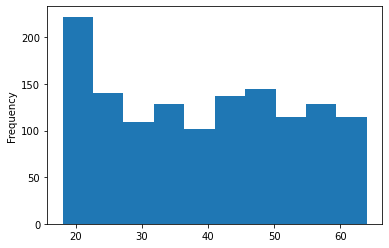

In [135]:
insuranceDataRaw['age'].plot.hist()

In [136]:
insuranceDataRaw['age'] = pd.cut(insuranceDataRaw['age'], bins = [0, 25, 40, 60, 100],
      labels = ["A", "B", "C", "D"])

<AxesSubplot:ylabel='Frequency'>

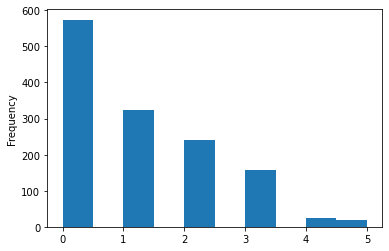

In [137]:
insuranceDataRaw['children'].plot.hist()

In [138]:
insuranceDataRaw['children'] = pd.cut(insuranceDataRaw['children'], 
                                      bins = [-1, 2, 4,10],
                                      labels = ["No/One Child", "Two/Three Children", "4+ Children"])

In [139]:
insuranceDataRaw.head(2)

,age,sex,bmi,children,smoker,region,charges
0,A,female,27.90,No/One Child,yes,southwest,16884.9240
1,A,male,33.77,No/One Child,no,southeast,1725.5523


In [140]:
insuranceDataRaw[['age']] = insuranceDataRaw[['age']].astype(object)
insuranceDataRaw[['children']] = insuranceDataRaw[['children']].astype(object)

In [141]:
insuranceDataRaw.dtypes

age          object
sex          object
bmi         float64
children     object
smoker       object
region       object
charges     float64
dtype: object

In [142]:
## Divide into Train and Test Set
## Use 90:10 Ratio
X = insuranceDataRaw.drop(["charges"], axis=1)
y = insuranceDataRaw[["charges"]]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                   random_state=42)

# Processing of Train

In [143]:
# Divide data into Categorical
insuranceTrainCategorical = x_train.select_dtypes("object")
insuranceTrainCategorical.head(2)

,age,sex,children,smoker,region
196,B,female,No/One Child,no,southwest
1209,C,male,No/One Child,no,southwest


In [144]:
# Check Null Values in Categorical
insuranceTrainCategorical.isna().sum()

age         0
sex         0
children    0
smoker      0
region      0
dtype: int64

In [145]:
# Divide data into Numerical
insuranceTrainNumerical = x_train.select_dtypes(np.number)

In [146]:
# Check Null Values in Numerical
insuranceTrainNumerical.isna().sum()

bmi    0
dtype: int64

In [147]:
# One Hot Encoding of Categorical
ohe = OneHotEncoder()
ohe.fit(insuranceTrainCategorical)
insuranceTrainCategoricalEncoded = pd.DataFrame(ohe.transform(insuranceTrainCategorical).toarray())

In [148]:
# MinMax Scaling of Numerical
mm = MinMaxScaler()
mm.fit(insuranceTrainNumerical)
insuranceTrainNumericalEncoded = pd.DataFrame(mm.transform(insuranceTrainNumerical),
             columns=insuranceTrainNumerical.columns)

In [149]:
# Concatenate DataFrame
insuranceTrainFinal = pd.concat([insuranceTrainCategoricalEncoded, insuranceTrainNumericalEncoded], axis=1)

In [150]:
# Initialize ML Models

logReg = LinearRegression()
sDescentReg = SGDRegressor()
lasso = Lasso(alpha=0.5)
ridge = Ridge(alpha=0.5)
eNet = ElasticNet(l1_ratio=0.4)

In [151]:
# Training the models

logReg.fit(insuranceTrainFinal, y_train)
sDescentReg.fit(insuranceTrainFinal, y_train)
lasso.fit(insuranceTrainFinal, y_train)
ridge.fit(insuranceTrainFinal, y_train)
eNet.fit(insuranceTrainFinal, y_train)

/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


ElasticNet(l1_ratio=0.4)

In [154]:
# Extra

bagg = BaggingRegressor(base_estimator = logReg) 
bagg.fit(insuranceTrainFinal, y_train)

/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


BaggingRegressor(base_estimator=LinearRegression())

# Processing of Test Set

In [124]:
# Divide data into Categorical
insuranceTestCategorical = x_test.select_dtypes(object)
insuranceTrainCategorical.head(2)

,age,sex,children,smoker,region
196,39,female,No/One Child,no,southwest
1209,59,male,No/One Child,no,southwest


In [125]:
# Check Null Values in Categorical
insuranceTestCategorical.isna().sum()

age         0
sex         0
children    0
smoker      0
region      0
dtype: int64

In [126]:
# Divide data into Numerical
insuranceTestNumerical = x_test.select_dtypes(np.number)

In [127]:
# Check Null Values in Numerical
insuranceTestNumerical.isna().sum()

bmi    0
dtype: int64

In [128]:
# One Hot Encoding of Categorical
insuranceTestCategoricalEncoded = pd.DataFrame(ohe.transform(insuranceTestCategorical).toarray())

In [129]:
# MinMax Scaling of Numerical
insuranceTestNumericalEncoded = pd.DataFrame(mm.transform(insuranceTestNumerical),
             columns=insuranceTestNumerical.columns)

In [130]:
# Concatenate DataFrame
insuranceTestFinal = pd.concat([insuranceTestCategoricalEncoded, insuranceTestNumericalEncoded], axis=1)

In [155]:
predLogReg = logReg.predict(insuranceTestFinal)
predSGD = sDescentReg.predict(insuranceTestFinal)
predLasso = lasso.predict(insuranceTestFinal)
predRidge = ridge.predict(insuranceTestFinal)
predENet = eNet.predict(insuranceTestFinal)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 16 is different from 59)

In [157]:
predBag = bagg.predict(insuranceTestFinal)

In [132]:
print("Linear Regression RMSE: \t", np.sqrt(mean_squared_error(predLogReg, y_test)))
print("SGD Regression RMSE: \t", np.sqrt(mean_squared_error(predSGD, y_test)))
print("Lasso Regression RMSE: \t", np.sqrt(mean_squared_error(predLasso, y_test)))
print("Ridge Regression RMSE: \t", np.sqrt(mean_squared_error(predRidge, y_test)))
print("Elastic Net Regression RMSE: \t", np.sqrt(mean_squared_error(predENet, y_test)))

Linear Regression RMSE: 	 5793.875966946274
SGD Regression RMSE: 	 5798.041326114611
Lasso Regression RMSE: 	 5792.559762162145
Ridge Regression RMSE: 	 5790.311181945142
Elastic Net Regression RMSE: 	 9203.400566550969


In [158]:
print("Bagging Based Regression RMSE: \t", np.sqrt(mean_squared_error(predBag, y_test)))

Bagging Based Regression RMSE: 	 2.390105743369829e+16
